<a href="https://colab.research.google.com/github/skycstage/skycstage/blob/main/Chemung_County_Car_Accident_Data_Analysis_2012_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><div><font face="Garamond" color="#33302e">
<b>Car Accidents in Chemung County from 2011 - 2021</b>
<h3><div><font face="Garamond" color="#33302e">
Sky C. Stage

<h3><div><font face="Garamond" color="#33302e">
This report is an analysis of Chemung County car accident data from the last 10 years. The data provided were two CSV files: one with 23,824 and 39 columns of features of each car accident occurence, and another with the longitude and latitude of each car accident occurence. <br>
<h3><div><font face="Garamond" color="#33302e">
The aim of this analysis was to find the most correlated feature with car accident occurence and to find car accident trends. Once the dataset is cleaned, manipulated, feature-engineered, and converted to geographic points, it is downloaded to import into Tableau for an interactive dashboard.

# <h1><div><font face="Garamond" color="#33302e">Getting started
<h3><div><font face="Garamond" color="#33302e">
First, we need to import all the libraries we're working with -- this includes Geopandas for handling geographic data, Plotly for charts and graphs, SciPy and SciKit-Learn for K-Means clustering and heatmapping, MatPlotLib for plotting, Pandas for dataframe manipulation, NumPy for handling data structures, and Seaborn to visualize correlations.

In [ ]:
#Install Geopandas
!pip install geopandas

#Import Pandas to view and manipulate dataframes
import pandas as pd

#Import NumPy (Numerical Python) to complete equations
import numpy as np

#Import Plotly graphing library
import plotly.express as px

#Import Geopandas to view and manipulate dataframes with Geographical features
import geopandas as gpd
from geopandas.tools import overlay
from geopandas import GeoSeries
from shapely.geometry import Point

#Import SciPy, Glob, and Scikit-Learn to complete cluster analysis
from scipy.spatial import cKDTree
import glob
from PIL import Image
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

#Import Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Import Seaborn for correlation visualizations
import seaborn as sns

#Import time for datetime conversions
import time 

#Import wkt to set geometry
from shapely import wkt

#Import SciPy ndimage and pylab for heatmap analysis
from scipy import ndimage
import matplotlib.pylab as pylab

#Make Matplotlib inline to view plots in notebook
%matplotlib inline

     |████████████████████████████████| 1.0 MB 39.7 MB/s 
     |████████████████████████████████| 6.3 MB 42.6 MB/s 
     |████████████████████████████████| 15.4 MB 25.7 MB/s 


# <h1><div><font face="Garamond" color="#33302e">Import the two datasets
<h3><div><font face="Garamond" color="#33302e">
One dataset contains all the features, and the other contains the geometry. Read the CSV files into the notebook with Pandas. 

In [ ]:
#Import the CSV with Pandas
crashes = pd.read_csv('/content/drive/MyDrive/Masters_Project/crashes.csv')

In [ ]:
#View the dataframe head
crashes.head(3)

Unnamed: 0 case_number  case_year  municipal_type        city  \
0           0    36246914       2016               3     Veteran   
1           1    37502954       2018               3  Horseheads   
2           2    34620463       2013               1      Elmira   

             street closest_cross_street reference_marker  \
0         MIDDLE RD                  NaN              NaN   
1               NaN                  NaN              NaN   
2  PENNSYLVANIA AVE               Sly St              NaN   

  at_intersection_boolean parking_lot_boolean accident_date accident_time  \
0                       N                   N       5/28/16       4:45 PM   
1                       N                   Y       9/28/18       2:54 PM   
2                       N                   N       1/17/13       2:35 PM   

   number_of_injuries  number_of_serious_injuries  number_of_fatalities  \
0                   0                           0                     0   
1                   0                           0                     0   
2                   0                           0                     0   

   number_of_vehicles dmv_classification_assigned_to_accident  \
0                   1                         PROPERTY DAMAGE   
1                   1                         PROPERTY DAMAGE   
2                   3                         PROPERTY DAMAGE   

                  accident_type collision_type   traffic_signal  \
0           COLLISION WITH DEER          OTHER  NO PASSING ZONE   
1  COLLISION WITH BUILDING/WALL          OTHER             NONE   
2  COLLISION WITH MOTOR VEHICLE          OTHER             NONE   

  light_condition weather road_surface_condition   county  vehicle_type_1  \
0        DAYLIGHT   CLEAR                    DRY  CHEMUNG  CAR/VAN/PICKUP   
1        DAYLIGHT   CLEAR                    DRY  CHEMUNG           TRUCK   
2        DAYLIGHT   CLEAR                    DRY  CHEMUNG  CAR/VAN/PICKUP   

   vehicle_type_2 direction_of_driver_vehicle_1 direction_of_driver_vehicle_2  \
0             NaN                         SOUTH                           NaN   
1             NaN                          EAST                           NaN   
2  CAR/VAN/PICKUP                         NORTH                         NORTH   

  apparent_factor_vehicle_1 apparent_factor_vehicle_2  driver_age_vehicle_1  \
0           ANIMAL'S ACTION                       NaN                  20.0   
1       DRIVER INEXPERIENCE                       NaN                  67.0   
2     FOLLOWING TOO CLOSELY            NOT APPLICABLE                  53.0   

   driver_age_vehicle_2 day_of_the_week     state  FID  Longitude   Latitude  \
0                   NaN             Sat  New York    0 -76.807990  42.270667   
1                   NaN             Fri  New York    1 -76.833982  42.150535   
2                  65.0             Thu  New York    2 -76.799550  42.084656   

                       full_address                                geometry  
0        MIDDLE RD,Veteran,New York        POINT (-76.80798971 42.27066689)  
1                               NaN  POINT (-76.83398249999999 42.15053491)  
2  PENNSYLVANIA AVE,Elmira,New York         POINT (-76.7995502 42.08465571)

In [ ]:
crashes.shape

(23824, 39)

In [ ]:
#Import the geometry CSV with Pandas
crashes_geo = pd.read_csv('/content/drive/MyDrive/Masters_Project/crash_geo_.csv')

In [ ]:
#View the dataframe head
crashes_geo.head(3)

FID  CASE_NUM    POINT_X    POINT_Y
0    0  36246914 -76.807990  42.270667
1    1  37502954 -76.833982  42.150535
2    2  34620463 -76.799550  42.084656

# <h1><div><font face="Garamond" color="#33302e">Merge the datasets
<h3><div><font face="Garamond" color="#33302e">
The two datasets were joined on the joinkey, case number, into one dataset and that dataset was converted into a Geopandas geographic dataframe. 

In [ ]:
#Rename the column to merge on
crashes = crashes.rename(columns={"case_number": "CASE_NUM"})

In [ ]:
#Merge the two datasets
crashes = pd.merge(crashes, crashes_geo, on='CASE_NUM', sort=False)

# <h1><div><font face="Garamond" color="#33302e">Find the number of null values
<h3><div><font face="Garamond" color="#33302e">
First replace all blank rows with NaN and find the sum of null values for each column. 

In [ ]:
#Replace blank rows with null
crashes = crashes.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Show the sum of null values for each column
crashes.isnull().sum()

Unnamed: 0                                     0
CASE_NUM                                       0
case_year                                      0
municipal_type                                 0
city                                         120
street                                      1518
closest_cross_street                        4493
reference_marker                           15685
at_intersection_boolean                        0
parking_lot_boolean                            0
accident_date                                  0
accident_time                                  4
number_of_injuries                             0
number_of_serious_injuries                     0
number_of_fatalities                           0
number_of_vehicles                             0
dmv_classification_assigned_to_accident        0
accident_type                                  0
collision_type                                 0
traffic_signal                                 0
light_condition     

# <h1><div><font face="Garamond" color="#33302e">Feature engineering part 1
<h3><div><font face="Garamond" color="#33302e">
Create a new column, "Full Address" with the car accident street, city, and state.

In [ ]:
#Rename the case number column
crashes = crashes.rename(columns={'QUERYID': 'id', 'CASE_NUM': 'case_number'})

In [ ]:
#Create new column, full address
crashes['full_address'] = crashes.street + "," + crashes.city + "," + crashes.state

# <h1><div><font face="Garamond" color="#33302e">Feature engineering part 2
<h3><div><font face="Garamond" color="#33302e">
Create a new column, "Geometry" from the Longitude and Latitude columnns. 

In [ ]:
#Rename the columns for longitude and latitude
crashes = crashes.rename(columns={'POINT_X': 'Longitude', 'POINT_Y': 'Latitude'})

# <h1><div><font face="Garamond" color="#33302e">Export the new dataframe as a CSV
<h3><div><font face="Garamond" color="#33302e">
Now that we have the datasets merged into one with the correct geometries, we can export the dataset for use throughout the report and in Tableau.

In [ ]:
#Create Points Geometry and export to CSV
#crashes = gpd.GeoDataFrame(crashes, geometry=gpd.points_from_xy(crashes.Longitude, crashes.Latitude))
#crashes.to_csv('crashes_geometry.csv')

# <h1><div><font face="Garamond" color="#33302e">Import the merged dataframe
<h3><div><font face="Garamond" color="#33302e">
We will need to know which columns we can use in our analysis, so car_accidents.columns was used to see the list of features.

In [ ]:
#Read in CSV with Pandas
car_accidents = pd.read_csv('/content/drive/MyDrive/Masters_Project/crashes_geometry.csv')

In [ ]:
#Look at the columns
car_accidents.columns

Index(['field_1', 'case_number', 'case_year', 'municipal_type', 'city',
       'street', 'closest_cross_street', 'reference_marker',
       'at_intersection_boolean', 'parking_lot_boolean', 'accident_date',
       'accident_time', 'number_of_injuries', 'number_of_serious_injuries',
       'number_of_fatalities', 'number_of_vehicles',
       'dmv_classification_assigned_to_accident', 'accident_type',
       'collision_type', 'traffic_signal', 'light_condition', 'weather',
       'road_surface_condition', 'county', 'vehicle_type_1', 'vehicle_type_2',
       'direction_of_driver_vehicle_1', 'direction_of_driver_vehicle_2',
       'apparent_factor_vehicle_1', 'apparent_factor_vehicle_2',
       'driver_age_vehicle_1', 'driver_age_vehicle_2', 'day_of_the_week',
       'state', 'FID', 'Longitude', 'Latitude', 'full_address', 'geometry'],
      dtype='object')

# <h1><div><font face="Garamond" color="#33302e">Feature engineering part 3
<h3><div><font face="Garamond" color="#33302e">Create new features, "Number of Accidents", "Severity Rate", "Month", and "Hour".<br><br>
$$Severity \ Rate = \frac{Number \ of \ Serious \ Injuries \ Per \ Accident *1000000} {Total \ Number \ of \ Accidents}$$<br>
$$Fatality\ Rate = \frac{Number \ of \ Fatalities \ Per \ Accident *1000000} {Total \ Number \ of \ Accidents}$$

In [ ]:
#Remove the years 2021 and 2011 from the dataset as there is incomplete data for those years
car_accidents = car_accidents[car_accidents.case_year != 2021]
car_accidents = car_accidents[car_accidents.case_year != 2011]

In [ ]:
#Create new Number of Accidents feature with the value counts of each case number
car_accidents['number_of_accidents'] = car_accidents['case_number'].map(car_accidents['case_number'].value_counts())

#Create new Severity Rate feature by dividing the number of serious injuries per accident by total number of accidents
car_accidents['severity_rate'] = ((car_accidents['number_of_serious_injuries'] *1000000) / car_accidents['number_of_accidents'].sum()) 

#Create new Fatality Rate feature by dividing the number of fatalities per accident by total number of accidents 
car_accidents['fatality_rate'] = ((car_accidents['number_of_fatalities'] *1000000) / car_accidents['number_of_accidents'].sum())

#Create new Month feature by pulling the accident month from accident date
car_accidents['month'] = pd.DatetimeIndex(car_accidents['accident_date']).month

#Create new Hour feature by pulling the hour from the accident time and formatting it as an hour
car_accidents['hour'] = pd.to_datetime(car_accidents['accident_time'], format='%H:%M:%S').dt.hour

In [ ]:
#Look at all columns with new features
car_accidents.columns

Index(['field_1', 'case_number', 'case_year', 'municipal_type', 'city',
       'street', 'closest_cross_street', 'reference_marker',
       'at_intersection_boolean', 'parking_lot_boolean', 'accident_date',
       'accident_time', 'number_of_injuries', 'number_of_serious_injuries',
       'number_of_fatalities', 'number_of_vehicles',
       'dmv_classification_assigned_to_accident', 'accident_type',
       'collision_type', 'traffic_signal', 'light_condition', 'weather',
       'road_surface_condition', 'county', 'vehicle_type_1', 'vehicle_type_2',
       'direction_of_driver_vehicle_1', 'direction_of_driver_vehicle_2',
       'apparent_factor_vehicle_1', 'apparent_factor_vehicle_2',
       'driver_age_vehicle_1', 'driver_age_vehicle_2', 'day_of_the_week',
       'state', 'FID', 'Longitude', 'Latitude', 'full_address', 'geometry',
       'number_of_accidents', 'severity_rate', 'month', 'hour'],
      dtype='object')

# <h1><div><font face="Garamond" color="#33302e">Prevalence Rates Per Thousand
<h3><div><font face="Garamond" color="#33302e">
$$Quotient = \frac{Total \ Number \ of \ Car \ Accidents} {1,000} = 21$$<br>
$$Number \ of \ Serious \ Injuries \ Per \ Thousand \ Accidents = \frac{Total \ Number \ of \ Serious \ Injuries} {Quotient} = 22$$<br><br><br>
There are 22 serious injuries per 1,000 accidents.<br><br><br>
$$Number \ of \ Fatalities \ Per \ Thousand \ Accidents = \frac{Total \ Number \ of \ Fatalities} {Quotient} = 2$$<br><br><br>
There are 2 fatalities per 1,000 accidents.

In [ ]:
quotient = car_accidents['number_of_accidents'].sum() / 1000
quotient

21.518

In [ ]:
number_of_serious_injuries_per_thousand_accidents = car_accidents['number_of_serious_injuries'].sum() / quotient
number_of_serious_injuries_per_thousand_accidents

22.213960405242123

In [ ]:
number_of_fatalities_per_thousand_accidents = car_accidents['number_of_fatalities'].sum() / quotient
number_of_fatalities_per_thousand_accidents

2.78836323078353

# <h1><div><font face="Garamond" color="#33302e">Prevalence Rates Per Hundred
<h3><div><font face="Garamond" color="#33302e">
$$Quotient = \frac{Total \ Number \ of \ Car \ Accidents} {100} = 215$$<br>
$$Number \ of \ Serious \ Injuries \ Per \ Hundred \ Accidents = \frac{Total \ Number \ of \ Serious \ Injuries} {Quotient} = 2$$<br><br><br>
There are 2 serious injuries per 100 accidents.<br><br><br>
$$Number \ of \ Fatalities \ Per \ Hundred \ Accidents = \frac{Total \ Number \ of \ Fatalities} {Quotient} = 0.2$$<br><br><br>
There are 0.2 fatalities per 100 accidents.

In [ ]:
quotient = car_accidents['number_of_accidents'].sum() / 100
quotient

215.18

In [ ]:
number_of_serious_injuries_per_thousand_accidents = car_accidents['number_of_serious_injuries'].sum() / quotient
number_of_serious_injuries_per_thousand_accidents

2.2213960405242124

In [ ]:
number_of_fatalities_per_thousand_accidents = car_accidents['number_of_fatalities'].sum() / quotient
number_of_fatalities_per_thousand_accidents

0.278836323078353

# <h1><div><font face="Garamond" color="#33302e">Remove null geometry
<h3><div><font face="Garamond" color="#33302e">
We will not be able to use rows with null geometries.

In [ ]:
#Delete all null geometry
car_accidents = car_accidents[car_accidents['geometry'].notna()]

# <h1><div><font face="Garamond" color="#33302e">Feature engineering part 4
<h3><div><font face="Garamond" color="#33302e">
Create a new feature, accident prone, that is a boolean of whether or not the car accident location is in an accident prone area.

In [ ]:
accident_prone = car_accidents['geometry'].value_counts()
accident_prone = accident_prone.reset_index()
accident_prone.head(20)

index  geometry
0         POINT (-76.79793343 42.08864237)       110
1         POINT (-76.79982342 42.09231738)        81
2          POINT (-76.80825539 42.0898324)        73
3         POINT (-76.79162338 42.09483442)        56
4         POINT (-76.82181647 42.16625939)        56
5         POINT (-76.80403244 42.08798942)        56
6   POINT (-76.84013342999999 42.16489346)        55
7         POINT (-76.81637748 42.08527743)        53
8         POINT (-76.80539046 42.09067438)        48
9          POINT (-76.80707144 42.0876054)        47
10        POINT (-76.81739747 42.08715544)        46
11  POINT (-76.81519239000001 42.09861039)        43
12  POINT (-76.82552846999999 42.12783645)        40
13  POINT (-76.80911740000001 42.09149241)        40
14        POINT (-76.80238143 42.08407738)        39
15        POINT (-76.83939848 42.16294547)        38
16  POINT (-76.83766144000001 42.15876042)        38
17        POINT (-76.80529847 42.08348745)        37
18        POINT (-76.82071239 42.16753244)        37
19  POINT (-76.80940550000001 42.10585144)        36

In [ ]:
#Reset index of new dataframe
accident_prone = accident_prone.rename(columns={'index': 'geometry', 'geometry': 'number_of_accidents'})

In [ ]:
#Make accident prone points, accidents over 5 in a 10-year period
accident_prone = accident_prone.loc[accident_prone['number_of_accidents']>5]

In [ ]:
#Set the crs for geometry
crs = {'init': 'epsg:2263'}

#Set the geometry in the dataframes
accident_prone['geometry'] = accident_prone['geometry'].apply(wkt.loads)
gdf1 = gpd.GeoDataFrame(accident_prone, geometry='geometry')

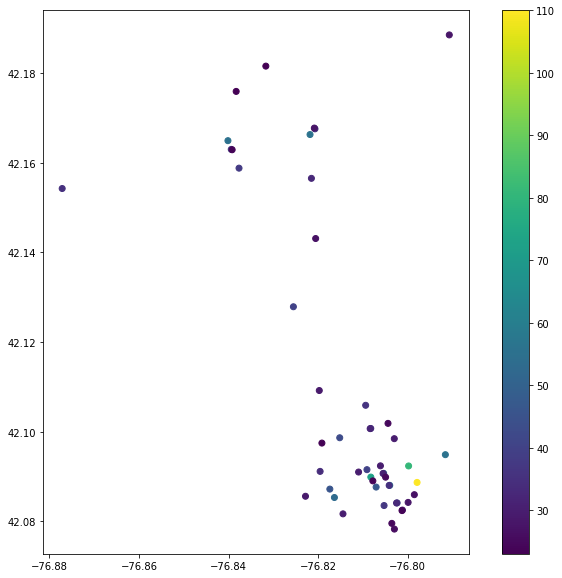

In [ ]:
gdf1.plot(column="number_of_accidents", figsize=(12,10), legend=True);

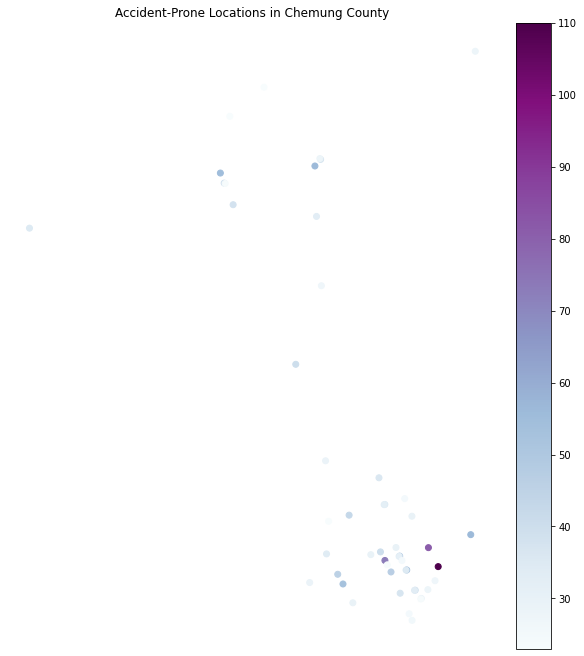

In [ ]:
fig, ax = plt.subplots(constrained_layout=True,figsize=(10,9))
gdf1.plot(column='number_of_accidents', cmap='BuPu',legend=True, ax=ax);

ax.xaxis.set_label_position('top')
ax.set_title('Accident-Prone Locations in Chemung County')

plt.axis('off')
plt.show()

In [ ]:
#Create accident prone boolean in car accidents dataframe
car_accidents['is_in_accident_prone'] = car_accidents["geometry"].isin(accident_prone["geometry"])

In [ ]:
car_accidents.head(3)

field_1 case_number  case_year  ...  month  hour is_in_accident_prone
0        0    36246914       2016  ...      5  16.0                False
1        1    37502954       2018  ...      9  14.0                False
2        2    34620463       2013  ...      1  14.0                False

[3 rows x 45 columns]

In [ ]:
#Save the feature-engineered car accident dataset to a CSV for later use
car_accidents.to_csv('/content/drive/MyDrive/Masters_Project/car_accident_clean.csv')

In [ ]:
accident_prone_features  = car_accidents[(car_accidents['is_in_accident_prone']==True)]

In [ ]:
accident_prone_features

field_1 case_number  case_year  ...  month  hour is_in_accident_prone
10          10    35980423       2015  ...     11  13.0                 True
16          16    35135240       2014  ...      2  10.0                 True
18          18    34780941       2013  ...      5   7.0                 True
26          26    35074835       2013  ...     12  10.0                 True
30          30    36020560       2015  ...     12  19.0                 True
...        ...         ...        ...  ...    ...   ...                  ...
23776    23776    34329025       2012  ...      6  17.0                 True
23781    23781    36455538       2016  ...     11  11.0                 True
23791    23791    38146887       2019  ...     10  19.0                 True
23793    23793    38272970       2020  ...      1  15.0                 True
23814    23814    37089536       2018  ...      1   6.0                 True

[1884 rows x 45 columns]

In [ ]:
#Save Accident Prone dataset to a CSV for later use
accident_prone_features.to_csv('/content/drive/MyDrive/Masters_Project/accident_prone.csv')

# <h1><div><font face="Garamond" color="#33302e">Create new dataframe, df_features
<h3><div><font face="Garamond" color="#33302e">
This will be used to analyze correlations between numerical features of accidents

In [100]:
#Include booleans for intersections and parking lots to analyze correlations
df_features = car_accidents[['Latitude', 'Longitude', 'at_intersection_boolean', 'parking_lot_boolean', 'is_in_accident_prone', 'city']]
df_features.head(3)

Latitude  Longitude at_intersection_boolean parking_lot_boolean  \
0  42.270667 -76.807990                       N                   N   
1  42.150535 -76.833982                       N                   Y   
2  42.084656 -76.799550                       N                   N   

   is_in_accident_prone        city  
0                 False     Veteran  
1                 False  Horseheads  
2                 False      Elmira

# <h1><div><font face="Garamond" color="#33302e">Create numerical scales of booleans 
<h3><div><font face="Garamond" color="#33302e">
Where $N \ |\  False = 0$, and $Y \ |\ True = 1$.

In [101]:
#Factorize the booleans on a numerical scale to analyze correlations
df_features['at_intersection_boolean'] = df_features.apply(lambda target: pd.factorize(df_features['at_intersection_boolean'], sort=True)[0])
df_features['parking_lot_boolean'] = df_features.apply(lambda target: pd.factorize(df_features['parking_lot_boolean'], sort=True)[0])
df_features['is_in_accident_prone'] = df_features.apply(lambda target: pd.factorize(df_features['is_in_accident_prone'], sort=True)[0])

#Confirm the columns are now integers
print(df_features.dtypes)

#Confirm N or False = 0 and True = 1
df_features.head(3)

Latitude                   float64
Longitude                  float64
at_intersection_boolean      int64
parking_lot_boolean          int64
is_in_accident_prone         int64
city                        object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Latitude  Longitude  at_intersection_boolean  parking_lot_boolean  \
0  42.270667 -76.807990                        0                    0   
1  42.150535 -76.833982                        0                    1   
2  42.084656 -76.799550                        0                    0   

   is_in_accident_prone        city  
0                     0     Veteran  
1                     0  Horseheads  
2                     0      Elmira

#<h1><div><font face="Garamond" color="#33302e">Find correlations 
<h3><div><font face="Garamond" color="#33302e">Intersections are most correlated with accident prone locations

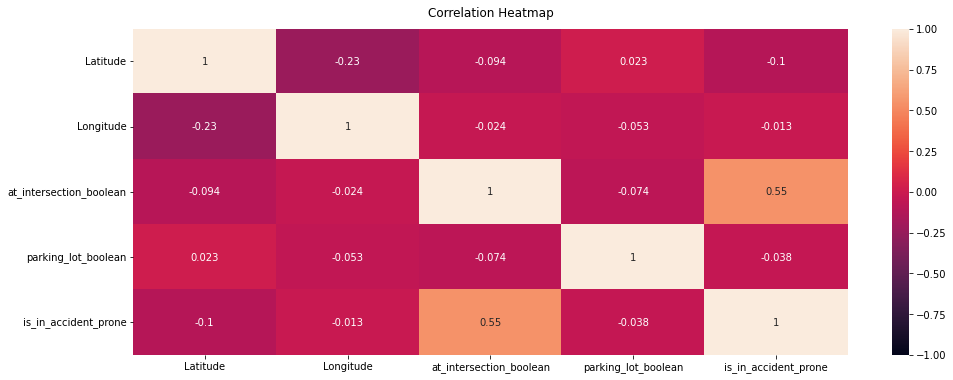

In [ ]:
#Plot the correlations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
fig = px.histogram(car_accidents, x="city", title='Elmira, NY has the highest frequency of accidents in Chemung County', nbins=8)
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

## <h1><div><font face="Garamond" color="#33302e">K-Means cluster analysis

<h3><div><font face="Garamond" color="#33302e">Cluster the accidents in Elmira, NY to see if there are any trends

In [102]:
#Make all columns lowercase
df_features = df_features.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'})

In [103]:
#Drop the other features
df_features = df_features[['latitude', 'longitude']]

In [104]:
#Set the plot style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [105]:
#Set the dataframe
df = df_features
df.head(3)

latitude  longitude
0  42.270667 -76.807990
1  42.150535 -76.833982
2  42.084656 -76.799550

In [106]:
#Define the plot features
def plot_geolocation_by_cluster(df_features, 
                                cluster=None, 
                                title=None, 
                                centers=None,
                                filename=None):
    
    #Transform df into geodataframe
    geo_df = gpd.GeoDataFrame(df.drop(['longitude', 'latitude'], axis=1),
                           crs={'init': 'epsg:4326'},
                           geometry=[Point(xy) for xy in zip(df.longitude, df.latitude)])
      
    #Set figure size
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    

    #Plot the clusters
    if cluster is not None:
        
        geo_df.plot(ax=ax, column=cluster, alpha=0.5, 
                    cmap='viridis', linewidth=0.8, zorder=2)
        
        if centers is not None:
            centers_gseries = GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))
            centers_gseries.plot(ax=ax, alpha=1, marker='X', color='red', markersize=100, zorder=3)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
        if filename is not None:
            fig.savefig(f'{filename}', bbox_inches='tight', dpi=300)
    else:
        geo_df.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
        fig.clf()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



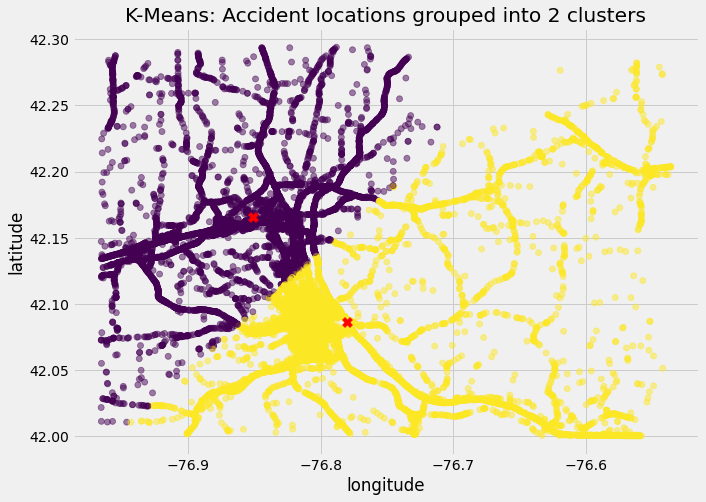

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



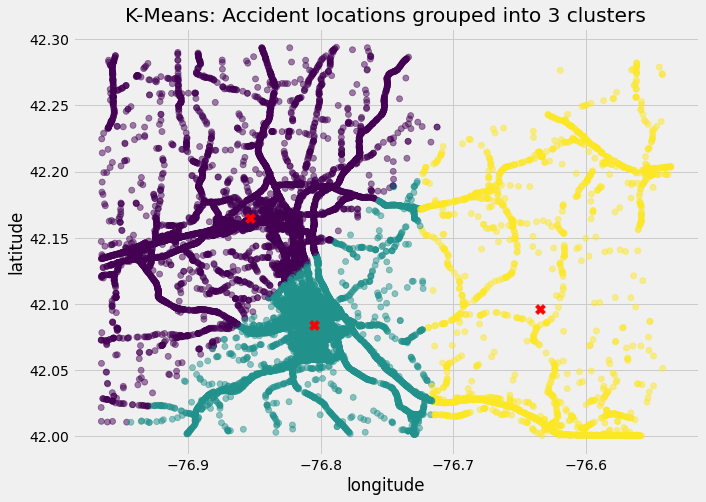

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



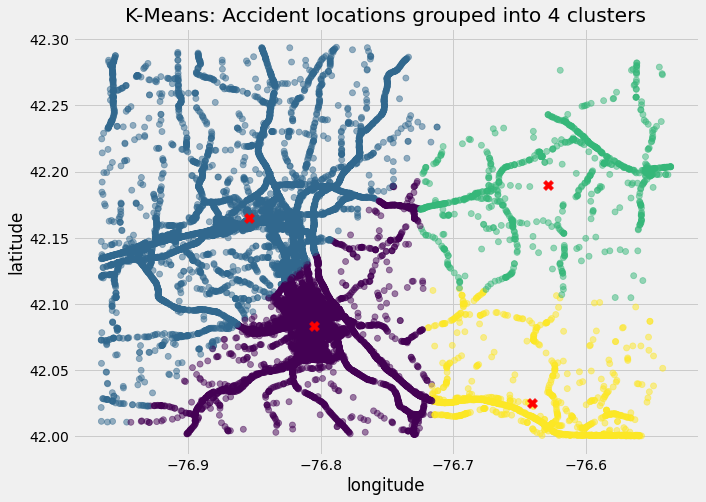

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



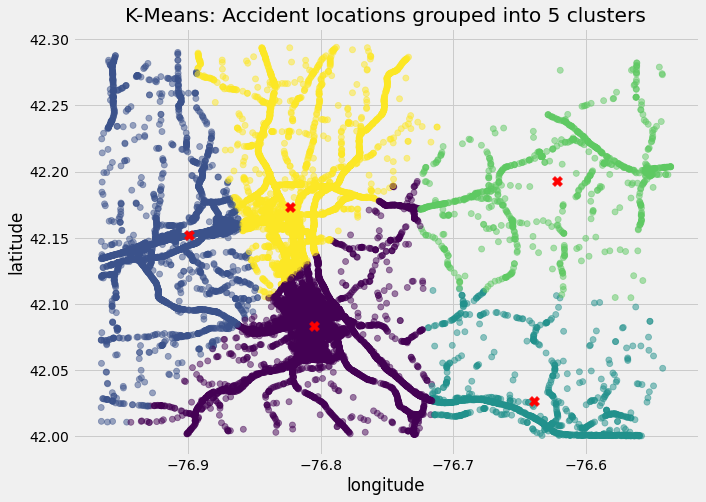

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



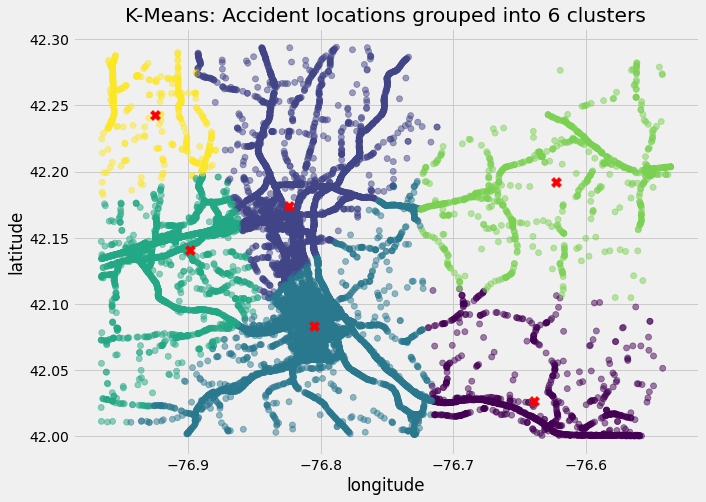

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



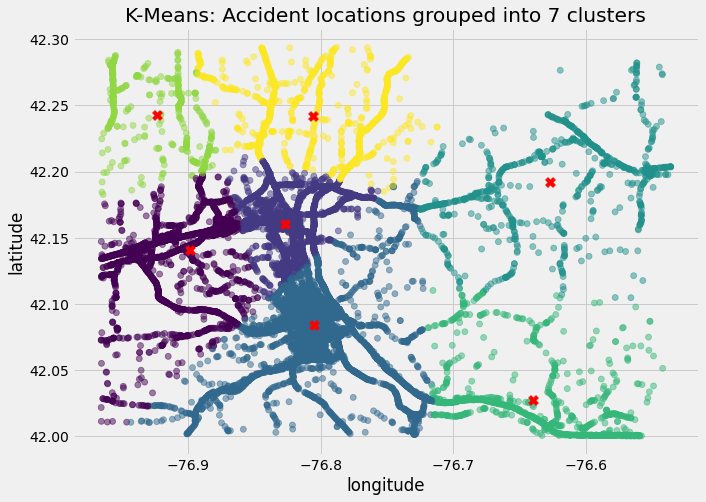

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



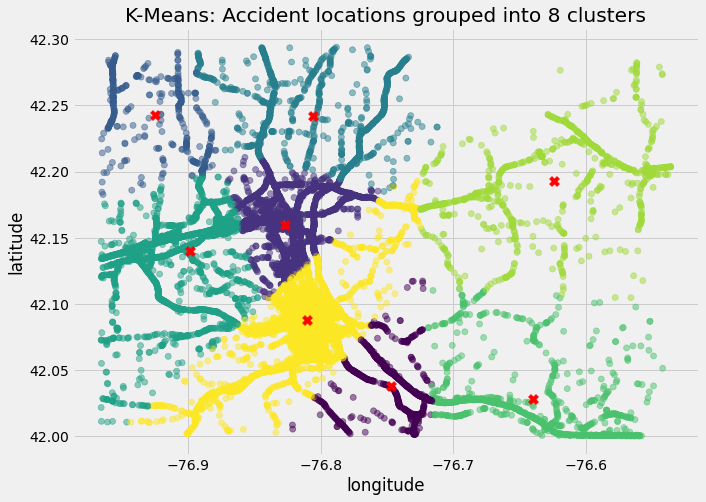

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



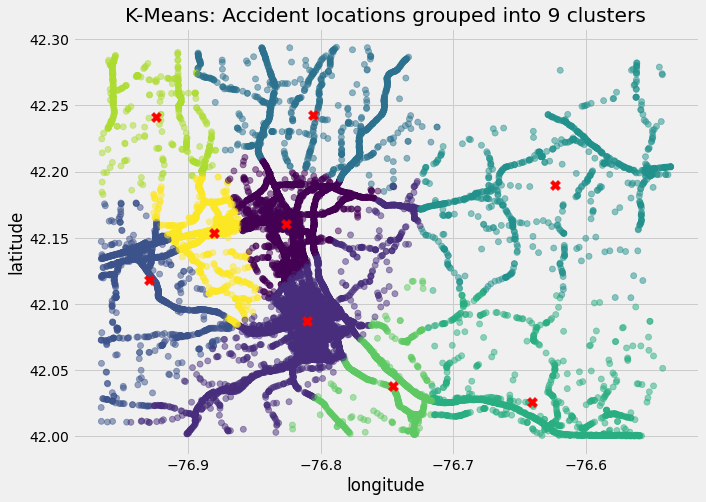

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



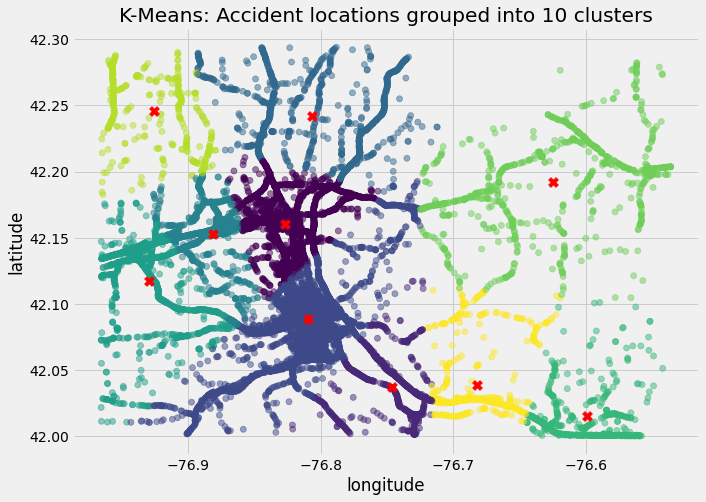

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



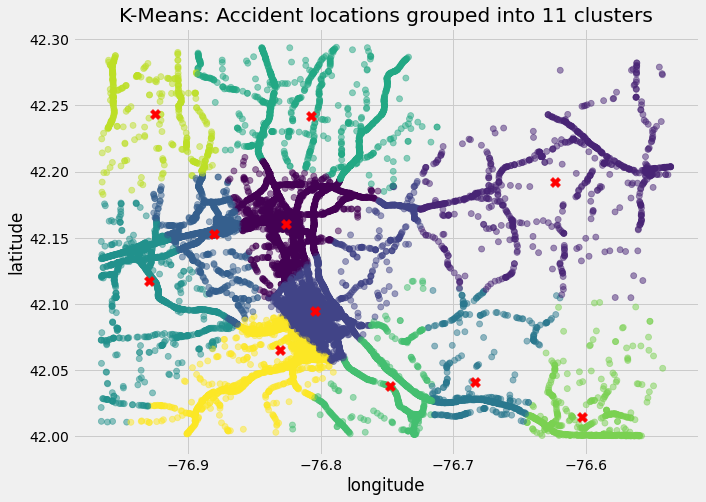

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



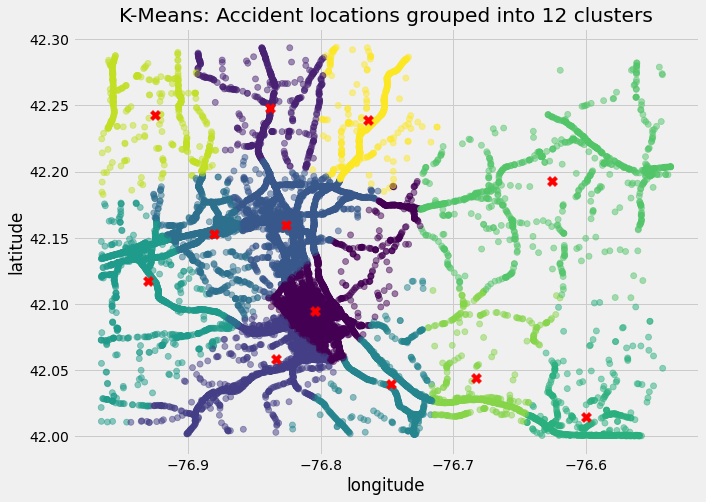

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



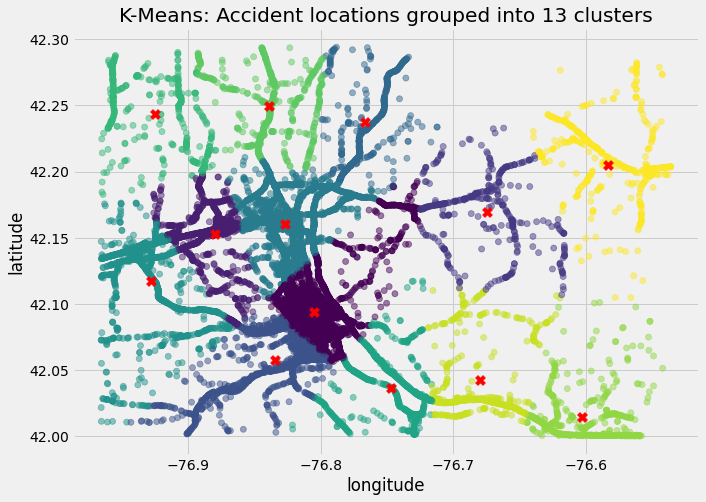

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



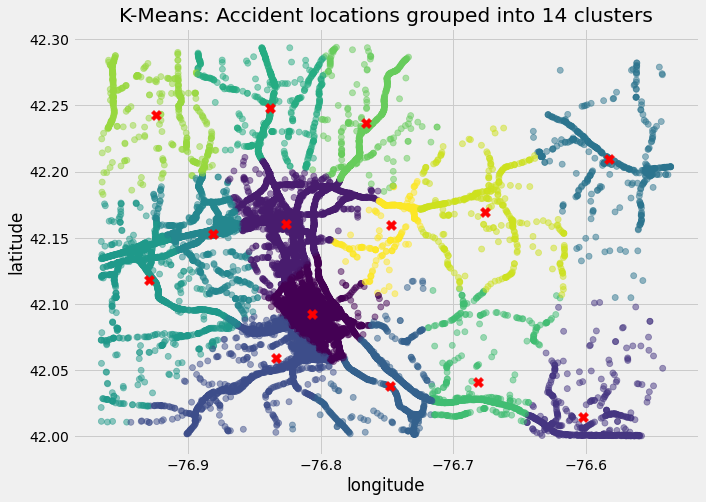

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



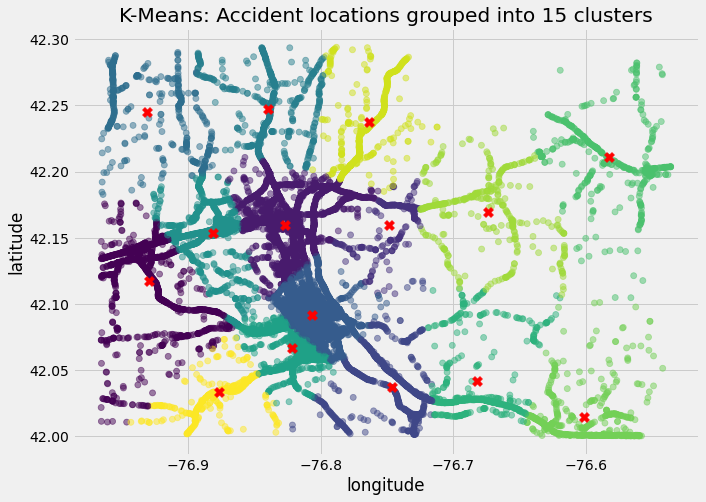

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



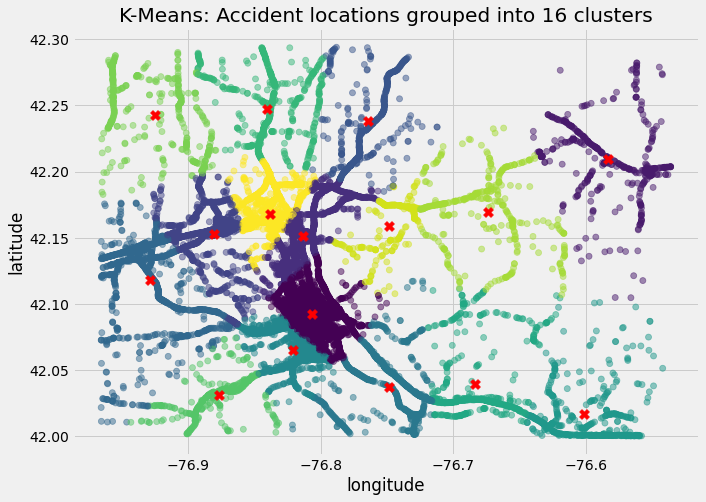

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



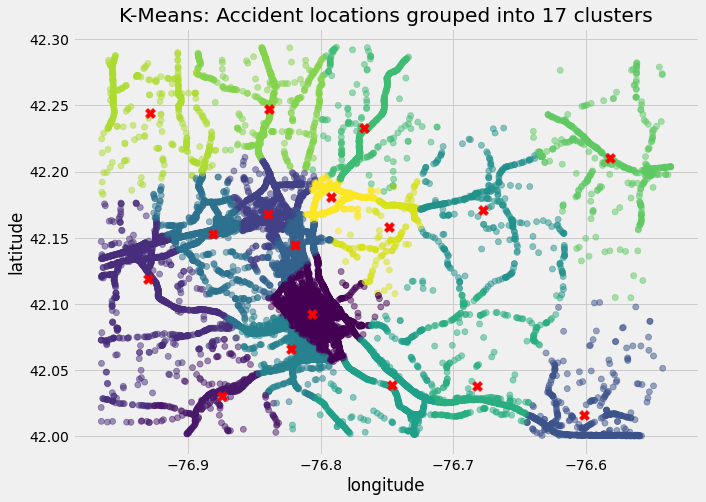

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



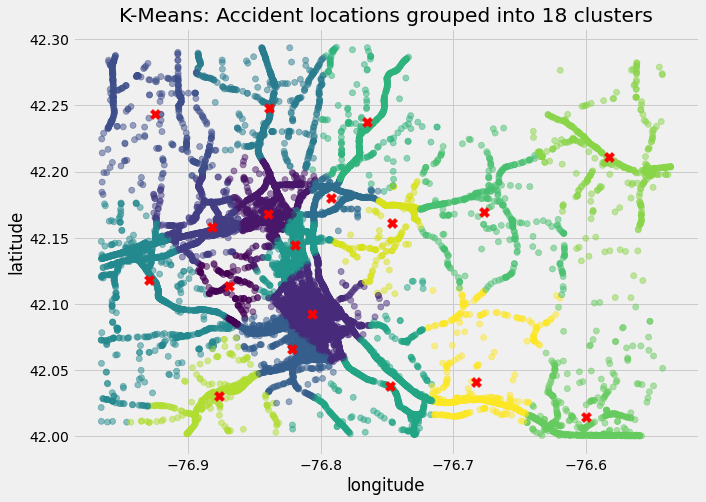

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



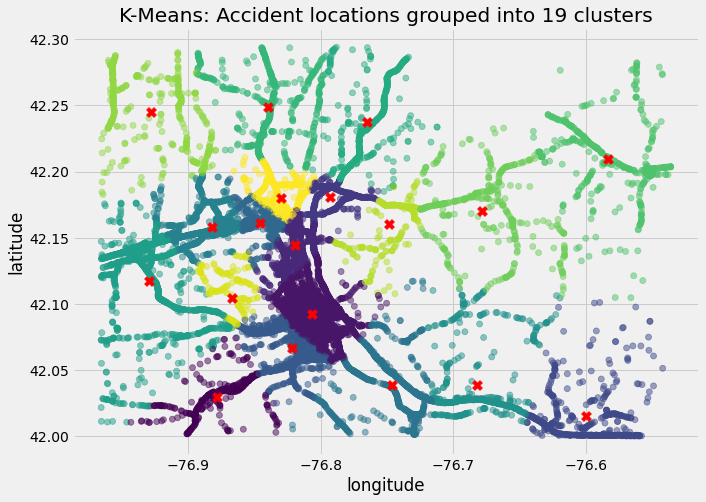

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



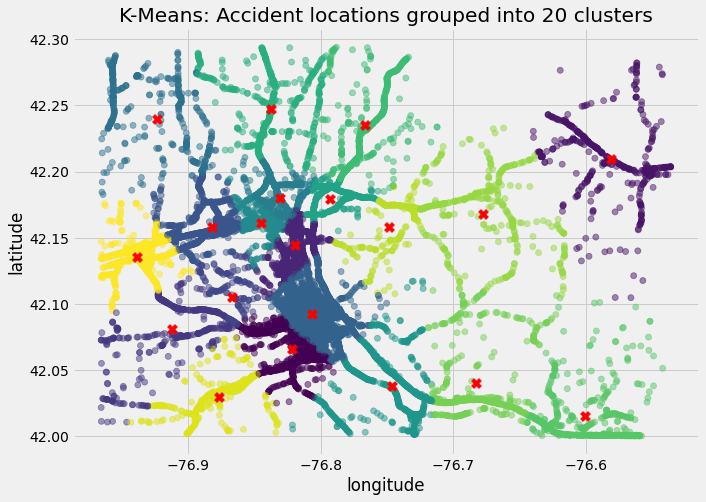

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



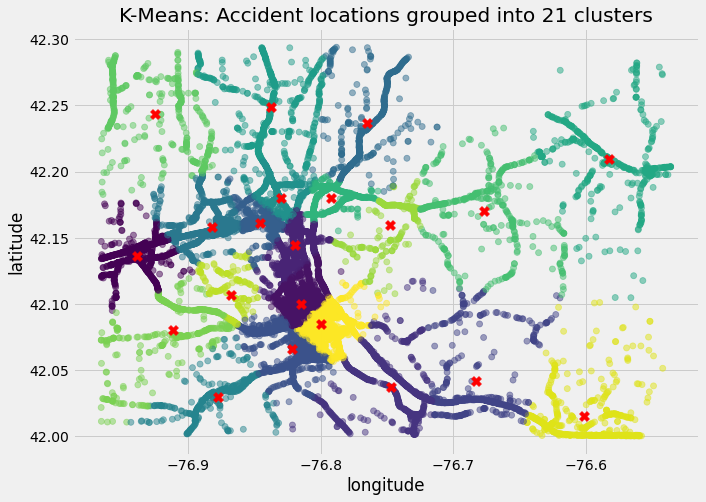

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



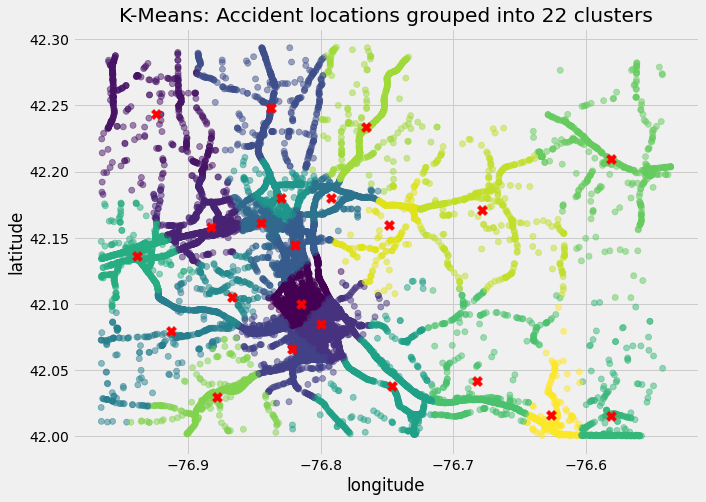

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



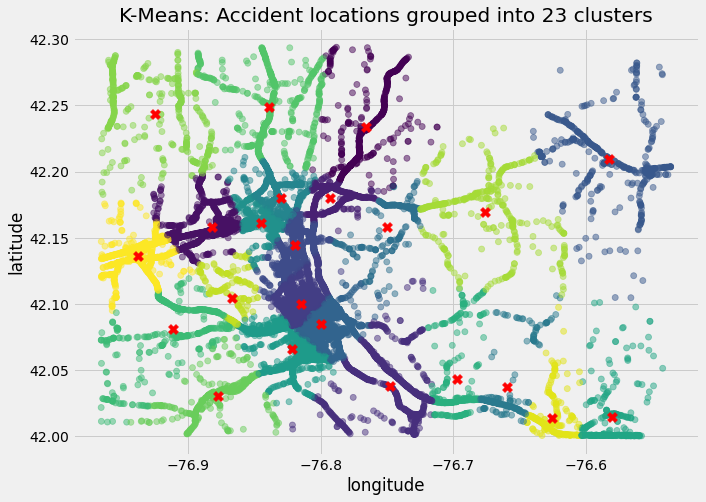

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



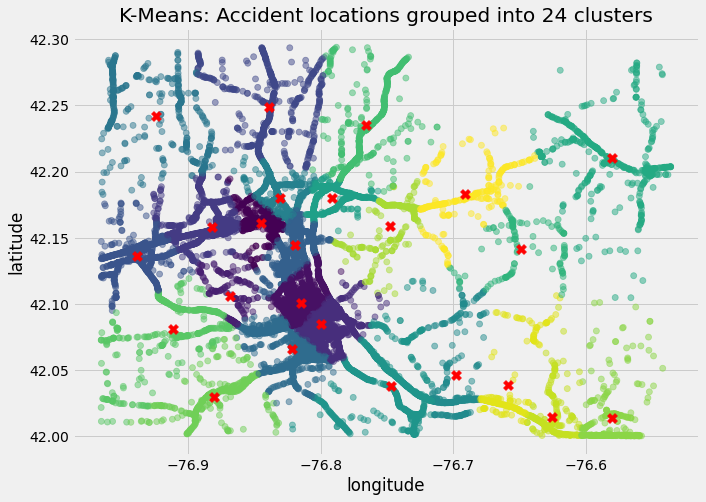

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



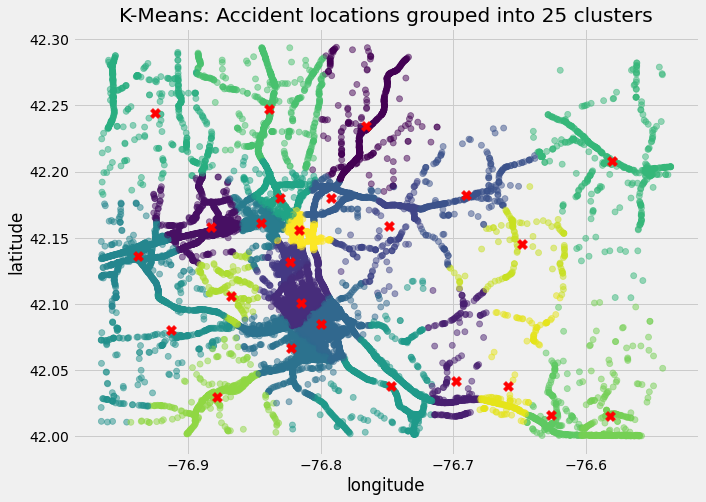

In [107]:
ssd = []

for i in range(2, 26):
    #Find clusters
    km = MiniBatchKMeans(n_clusters=i)
    km.fit_predict(df_features)
    
    #Label cluster centers
    centers = km.cluster_centers_
    
    #Calculate sum of squared distances
    ssd.append(km.inertia_)
    
    #Get cluster center
    df_features['cluster'] = km.labels_
    
    #Plot lat/long and clusters on map
    plot_geolocation_by_cluster(df_features, cluster='cluster', 
                                title= f'K-Means: Accident locations grouped into {i} clusters',
                                centers=centers)

Text(0.5, 1.0, 'Elbow Method to Find Optimal Value of k')

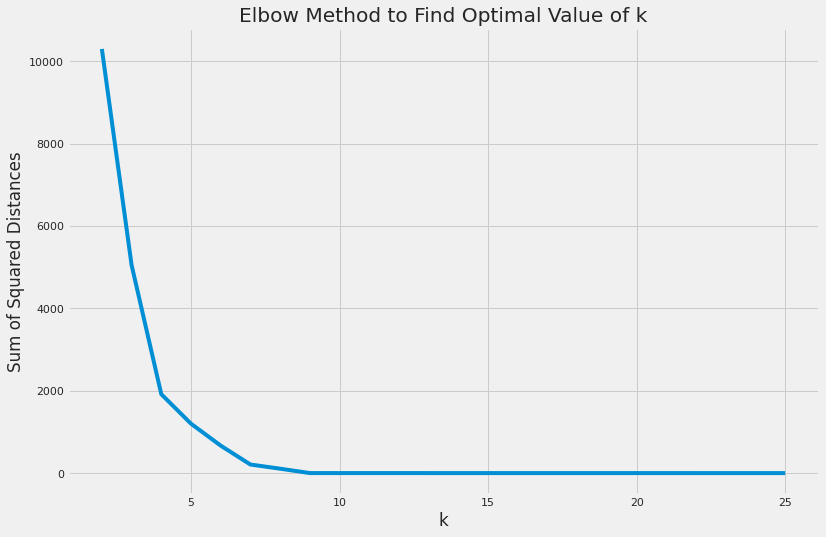

In [ ]:
plt.plot(range(2,26), ssd)
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Find Optimal Value of k')

# <h1><div><font face="Garamond" color="#33302e">Visualize accident prone areas

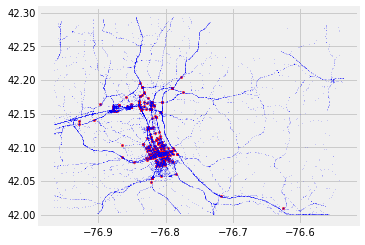

In [ ]:
#Set the crs for geometry
crs = {'init': 'epsg:2263'}

#Set the geometry in the dataframes
accident_prone['geometry'] = accident_prone['geometry'].apply(wkt.loads)
car_accidents['geometry'] = car_accidents['geometry'].apply(wkt.loads)
gdf1 = gpd.GeoDataFrame(accident_prone, geometry='geometry')
gdf2 = gpd.GeoDataFrame(car_accidents, geometry='geometry')

#Plot the accident prone areas
fig, ax = plt.subplots()
gdf1.plot(markersize=5, color='red',ax=ax)
gdf2.plot(markersize=.01, color='blue',ax=ax)
plt.show();

# <h1><div><font face="Garamond" color="#33302e">Create heatmap of intersections

<h3><div><font face="Garamond" color="#33302e">Since accident-prone locations are positively correlated with intersections, we need to view the points in the dataset that are located at intersections.

In [ ]:
#Create new dataframe of points only at an instersection
at_intersection = car_accidents[(car_accidents['at_intersection_boolean']=='Y')]

In [ ]:
#Set the dataframe for the heatmap generation
d = at_intersection

In [ ]:
#Set the plot parameters
pylab.rcParams['figure.figsize'] = 8, 6

#Create the heatmap
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning:

divide by zero encountered in log



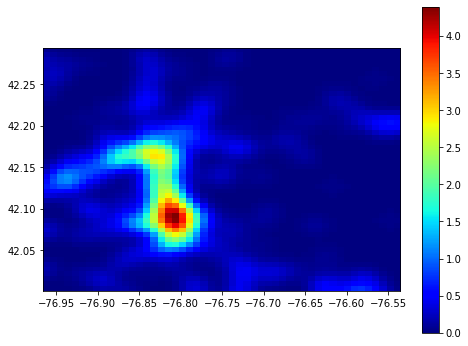

In [ ]:
#Plot the heatmap
heatmap(gdf, bins=50, smoothing=1.5)

# <h1><div><font face="Garamond" color="#33302e">Create plot of intersections

<h3><div><font face="Garamond" color="#33302e">Since accident-prone locations are positively correlated with intersections, we need to view the points in the dataset that are located at intersections.

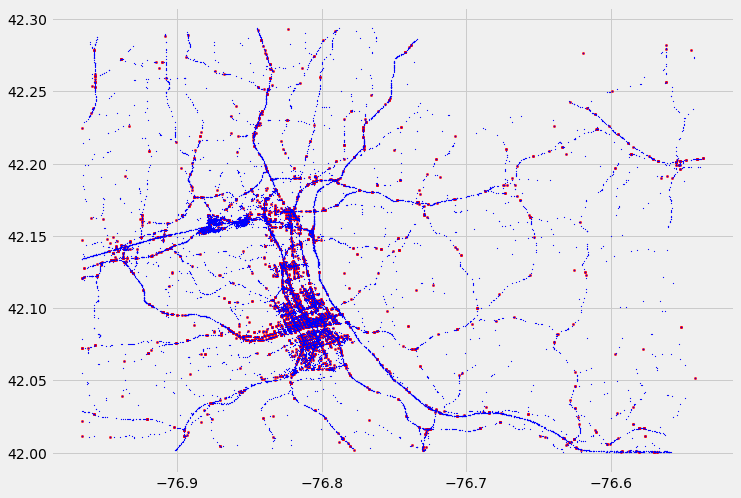

In [ ]:
#Set CRS
crs = {'init': 'epsg:2263'}

#Apply geometry to intersection dataframe
at_intersection['geometry'] = at_intersection['geometry'].apply(wkt.loads)
gdf1 = gpd.GeoDataFrame(at_intersection, geometry='geometry')
gdf2 = gpd.GeoDataFrame(car_accidents, geometry='geometry')

#Plot the points
fig, ax = plt.subplots()
gdf1.plot(markersize=5, color='red',ax=ax)
gdf2.plot(markersize=.5, color='blue',ax=ax)
plt.show();

## <h1><div><font face="Garamond" color="#33302e">Plot points of collisions with pedestrians or bicyclists

<h3><div><font face="Garamond" color="#33302e">Let's see the locations where collisions with bicyclists or pedestrians occur.

In [ ]:
collision_with_bicyclist_pedestrian = car_accidents[(car_accidents['accident_type']=='COLLISION WITH BICYCLIST') | (car_accidents['accident_type']=='COLLISION WITH PEDESTRIAN') | (car_accidents['accident_type']=='COLLISION WITH OTHER PEDESTRIAN')]

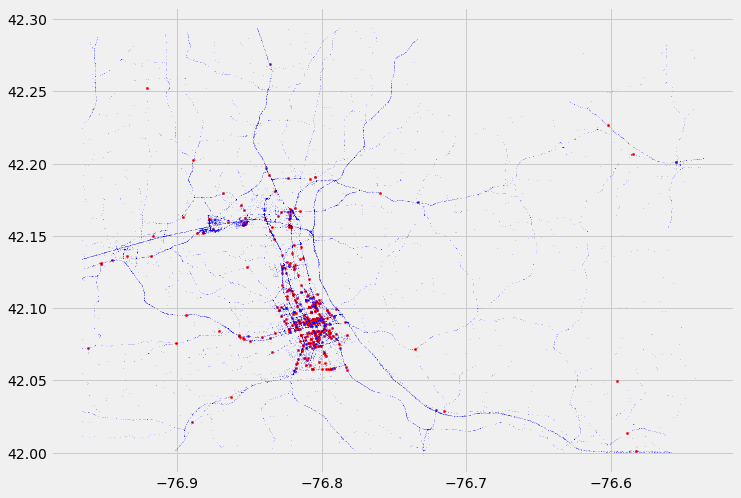

In [ ]:
from shapely import wkt
crs = {'init': 'epsg:2263'}
#collision_with_bicyclist_pedestrian['geometry'] = collision_with_bicyclist_pedestrian['geometry'].apply(wkt.loads)
gdf1 = gpd.GeoDataFrame(collision_with_bicyclist_pedestrian, geometry='geometry')
gdf2 = gpd.GeoDataFrame(car_accidents, geometry='geometry')
fig, ax = plt.subplots()
gdf1.plot(markersize=5, color='red',ax=ax)
gdf2.plot(markersize=.01, color='blue',ax=ax)
plt.show();

## <h1><div><font face="Garamond" color="#33302e">Create heatmap of collisions with pedestrians or bicyclists

<h3><div><font face="Garamond" color="#33302e">Let's see the hotspots of  collisions with bicyclists or pedestrians.

In [ ]:
#Set the dataframe
d = gdf1

In [ ]:
#Set the plot parameters
pylab.rcParams['figure.figsize'] = 8, 6

#Create the heatmap
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning:

divide by zero encountered in log



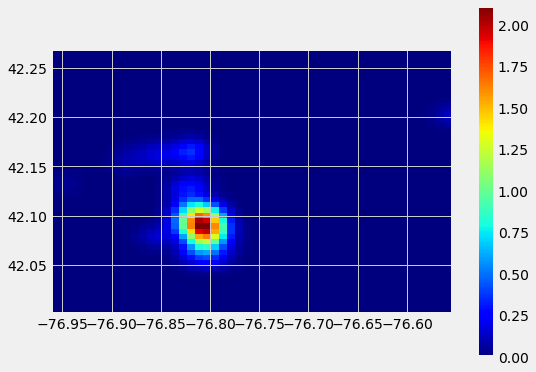

In [ ]:
#Plot the heatmap
heatmap(gdf1, bins=50, smoothing=1.5)

# <h1><div><font face="Garamond" color="#33302e">Exploratory analysis of accidents 

In [ ]:
#Set dataframe as dataset with accident prone locations
df = accident_prone_features

#Plot a histogram of the most occuring hour of accidents
fig = px.histogram(df, x="hour", title="3:00 PM has the highest frequency of car accidents at accident-prone locations", nbins=20)
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
#Set dataframe as the entire dataframe  of car accidents
df = car_accidents

#Plot the results
fig = px.histogram(df, x="case_year", title="2018 had the highest frequency of car accidents", nbins=8)
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
#See how many number of serious injuries there've been
car_accidents['number_of_serious_injuries'].unique()

array([0, 1, 3, 2, 4])

In [ ]:
#See how many number of fatalities there've been
car_accidents['number_of_fatalities'].unique()

array([0, 1, 2])

# <h1><div><font face="Garamond" color="#33302e">At most, there've been either 4 serious injuries or 2 fatalities per car accident

In [ ]:
#Create new dataframe where serious injuries are more than zero
severe_accidents = car_accidents.loc[car_accidents['number_of_serious_injuries']>0]

#Set the dataframe
df = severe_accidents

#Plot the results
fig = px.histogram(df, x="case_year", title='2017 had the highest frequency of severe accidents', nbins=8)
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
#Set the dataframe
df = severe_accidents

#Plot the results
fig = px.histogram(df, x="day_of_the_week", title="Friday is the day-of-the-week with the most severe accidents", category_orders=dict(day=["Thur", "Fri", "Sat", "Sun"]))
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
#Set the dataframe
df = car_accidents

#Plot the results
fig = px.histogram(df, x="month", title="November has the highest frequency of car accidents recorded", nbins=20)
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
#Set the dataframe
df = car_accidents

#Plot the results
fig = px.histogram(df, x="driver_age_vehicle_1",title="Younger drivers are in more car accidents", nbins=20)
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
#Filter the dataframe for severe accidents (serious injuries more than 0)
severe_accidents['counts'] = severe_accidents['case_number'].map(severe_accidents['case_number'].value_counts())
accidents_by_year = severe_accidents.groupby('case_year')['counts'].agg(['sum'])
accidents_by_year = accidents_by_year.reset_index()

#Plot the results
fig = px.line(accidents_by_year, x="case_year", y="sum", title="2017 had the highest frequency of severe car accidents")
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Filter the dataframe for severe accidents and the weather
grouped_multiple = car_accidents.groupby(['month', 'weather', 'severity_rate']).agg({'number_of_accidents': ['sum']})
month_weather = grouped_multiple.reset_index()
month_weather = month_weather.rename(columns={'sum': 'sum_of_accidents'})
month_weather = month_weather.set_axis(['month', 'weather', 'severity_rate', 'sum_of_accidents'], axis=1, inplace=False)
df = month_weather

#Plot the results
fig = px.histogram(df, x="severity_rate", color="weather", title="More severe accidents occur in cloudy weather")
fig.layout.template = 'ggplot2'
fig.update_layout(font_family="Droid Serif")
fig.show()

In [ ]:
severe_accidents['counts'] = severe_accidents['case_number'].map(severe_accidents['case_number'].value_counts())
severe_accidents_by_year = severe_accidents.groupby('case_year')['counts'].agg(['sum'])
severe_accidents_by_year = severe_accidents_by_year.reset_index()

fatal_accidents = car_accidents.loc[car_accidents['number_of_fatalities']>0]
fatal_accidents['counts'] = fatal_accidents['case_number'].map(fatal_accidents['case_number'].value_counts())
fatal_accidents_by_year = fatal_accidents.groupby('case_year')['counts'].agg(['sum'])
fatal_accidents_by_year = fatal_accidents_by_year.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



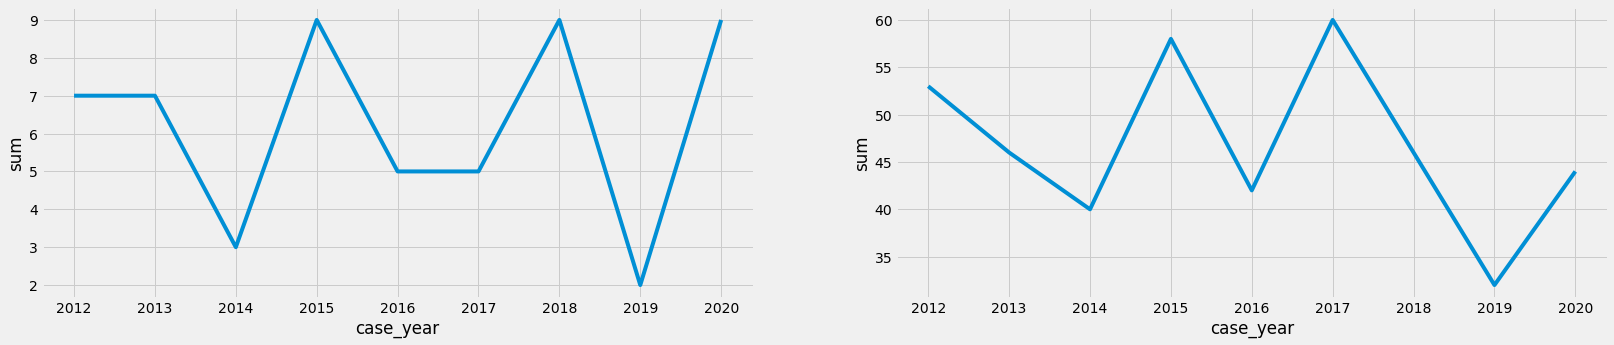

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (25, 5));

sns.lineplot(x="case_year", y="sum",  data=fatal_accidents_by_year, ax=ax[0]);
sns.lineplot(x="case_year", y="sum",  data=severe_accidents_by_year, ax=ax[1]);

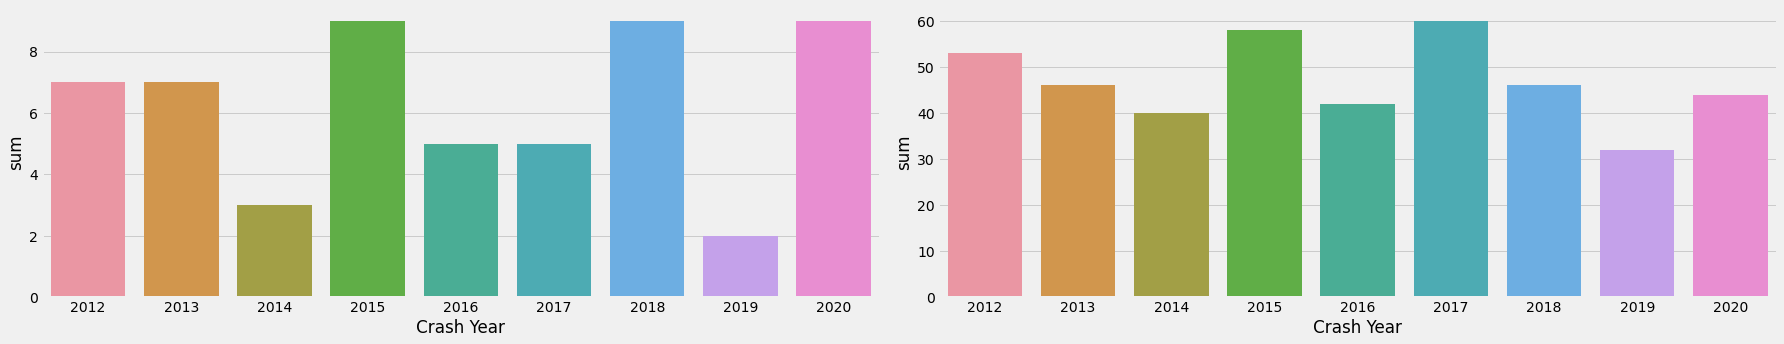

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (25, 5));

sns.barplot(x="case_year", y="sum",  data=fatal_accidents_by_year, ax=ax[0]);
sns.barplot(x="case_year", y="sum",  data=severe_accidents_by_year, ax=ax[1]);
[ax[i].set_xlabel('Crash Year') for i in range(2)]
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



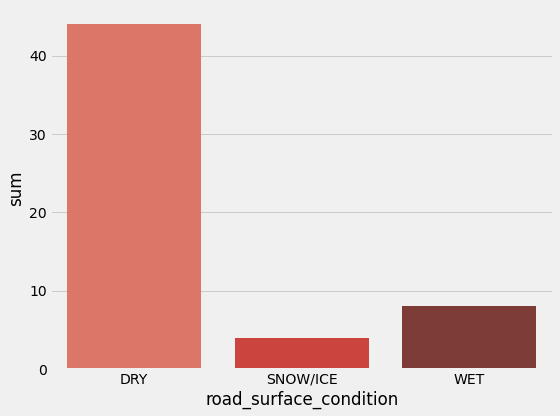

In [ ]:
fatal_accidents['counts'] = fatal_accidents['case_number'].map(fatal_accidents['case_number'].value_counts())
fatal_accidents_by_surface = fatal_accidents.groupby('road_surface_condition')['counts'].agg(['sum'])
fatal_accidents_by_surface = fatal_accidents_by_surface.reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='road_surface_condition',y = 'sum',data=fatal_accidents_by_surface, palette="Reds_d")
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



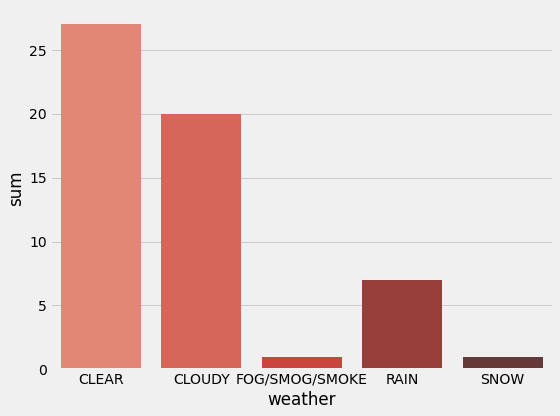

In [ ]:
fatal_accidents['counts'] = fatal_accidents['case_number'].map(fatal_accidents['case_number'].value_counts())
fatal_accidents_by_weather = fatal_accidents.groupby('weather')['counts'].agg(['sum'])
fatal_accidents_by_weather = fatal_accidents_by_weather.reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='weather',y = 'sum',data=fatal_accidents_by_weather, palette="Reds_d")
plt.tight_layout()